In [1]:
import gpflow
import numpy as np

In [2]:
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
plt = matplotlib.pyplot

In [11]:
#make a dataset with two outputs, correlated, heavy-tail noise. One has more noise than the other.
X1 = np.random.rand(100, 1)
X2 = np.random.rand(50, 1) * 0.5
Y1 = np.sin(6*X1) + np.random.standard_t(3, X1.shape)*0.03
Y2 = np.sin(6*X2+ 0.7) + np.random.standard_t(3, X2.shape)*0.1

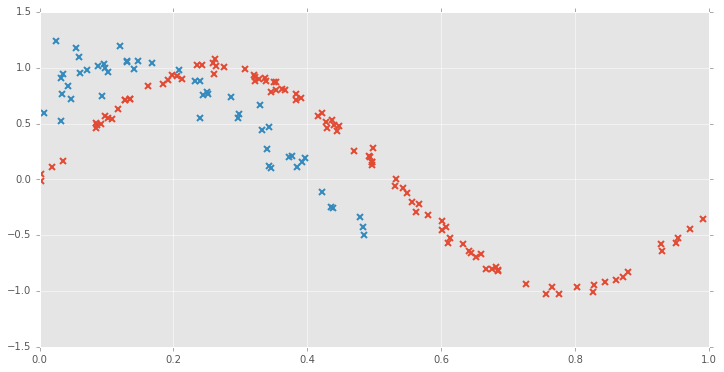

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(X1, Y1, 'x', mew=2)
plt.plot(X2, Y2, 'x', mew=2)
#plt.ylim(-2, 2)

In [15]:
# build a variational model
lik = gpflow.likelihoods.SwitchedLikelihood([gpflow.likelihoods.StudentT(), gpflow.likelihoods.StudentT()])
k1 = gpflow.kernels.Matern32(1)
coreg = gpflow.kernels.Coregion(1, output_dim=2, rank=1, active_dims=[1])
kern = k1 * coreg
X_augmented = np.vstack((np.hstack((X1, np.zeros_like(X1))), np.hstack((X2, np.ones_like(X2)))))
Y_augmented = np.vstack((np.hstack((Y1, np.zeros_like(X1))), np.hstack((Y2, np.ones_like(X2)))))

#m = gpflow.vgp.VGP(X_augmented, Y_augmented, kern=kern, likelihood=lik, num_latent=1)
m = gpflow.svgp.SVGP(X_augmented, Y_augmented,
                     kern=kern, likelihood=lik, num_latent=1,
                     Z=X_augmented[::3].copy())

In [16]:
_ = m.optimize(max_iters=500)


compiling tensorflow function...
done
optimization terminated, setting model state


/Users/james/anaconda/lib/python2.7/site-packages/tensorflow/python/ops/gradients.py:89: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


(-2, 2)

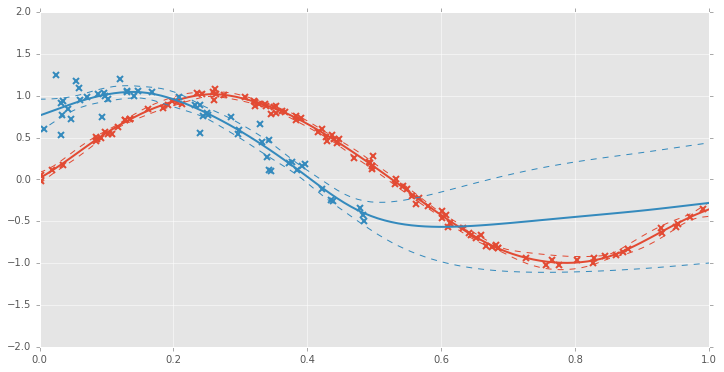

In [19]:
plt.figure(figsize=(12, 6))
xtest = np.linspace(0, 1, 100)[:,None]
line, = plt.plot(X1, Y1, 'x', mew=2)
mu, var = m.predict_f(np.hstack((xtest, np.zeros_like(xtest))))
plt.plot(xtest, mu, color=line.get_color(), lw=2)
plt.plot(xtest, mu + 2*np.sqrt(var), '--', color=line.get_color())
plt.plot(xtest, mu - 2*np.sqrt(var), '--', color=line.get_color())

line, = plt.plot(X2, Y2, 'x', mew=2)
mu, var = m.predict_f(np.hstack((xtest, np.ones_like(xtest))))
plt.plot(xtest, mu, color=line.get_color(), lw=2)
plt.plot(xtest, mu + 2*np.sqrt(var), '--', color=line.get_color())
plt.plot(xtest, mu - 2*np.sqrt(var), '--', color=line.get_color())

plt.ylim(-2, 2)

In [25]:
m.kern.coregion.W = np.random.randn(2, 1)

In [27]:
m.optimize()

optimization terminated, setting model state


      fun: -171.98996805001164
 hess_inv: <2658x2658 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.40972598, -0.22189581,  0.79057678, ..., -0.        ,
        0.07240227, -0.        ])
  message: 'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
     nfev: 1100
      nit: 1001
   status: 1
  success: False
        x: array([-3.57596878, -2.33750697,  0.13213781, ...,  1.        ,
        0.11861602,  1.        ])

(-2, 2)

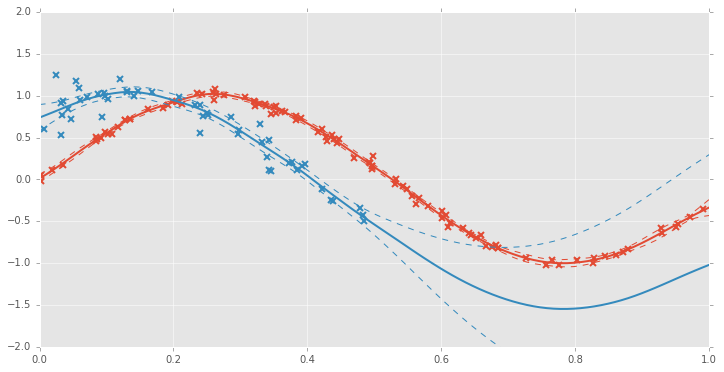

In [28]:
plt.figure(figsize=(12, 6))
xtest = np.linspace(0, 1, 100)[:,None]
line, = plt.plot(X1, Y1, 'x', mew=2)
mu, var = m.predict_f(np.hstack((xtest, np.zeros_like(xtest))))
plt.plot(xtest, mu, color=line.get_color(), lw=2)
plt.plot(xtest, mu + 2*np.sqrt(var), '--', color=line.get_color())
plt.plot(xtest, mu - 2*np.sqrt(var), '--', color=line.get_color())

line, = plt.plot(X2, Y2, 'x', mew=2)
mu, var = m.predict_f(np.hstack((xtest, np.ones_like(xtest))))
plt.plot(xtest, mu, color=line.get_color(), lw=2)
plt.plot(xtest, mu + 2*np.sqrt(var), '--', color=line.get_color())
plt.plot(xtest, mu - 2*np.sqrt(var), '--', color=line.get_color())

plt.ylim(-2, 2)

In [29]:
m.kern

Name,values,prior,constraint
kern.matern32.variance,[ 0.76139805],None,+ve
kern.matern32.lengthscales,[ 0.89748703],None,+ve
kern.coregion.W,[[-1.50611611] [-1.33370778]],None,(none)
kern.coregion.kappa,[ 0.55070398 1.22935634],None,+ve
